In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

from inference import *

In [4]:
encoder = Encoder().to(device)
importance = Importance().to(device)
decoder = Decoder().to(device)
probabilityModel = ProbabilityModel().to(device)
vgg16 = VGG16().to(device)

# load weights
arch = torch.load('/mnt/HDD3/weights_all/b2')
encoder.load_state_dict(arch['encoder'])
importance.load_state_dict(arch['importance'])
decoder.load_state_dict(arch['decoder'])
probabilityModel.load_state_dict(arch['probabilityModel'])

# kmeans on decoder bias
dec_bias = []
dec_bias.append(list(decoder.conv1[0].bias.detach().cpu().numpy()) +
                    list(decoder.conv2[0].bias.detach().cpu().numpy()) +
                    list(decoder.conv3.bias.detach().cpu().numpy()))

dec_bias_raw, d1, d2, d3 = arch['dec_bias_raw'], arch['d1'], arch['d2'], arch['d3']
# kmeans = KMeans(n_clusters=256, random_state=0).fit(dec_bias_raw)
# dec_bias_center = torch.nn.Parameter(torch.tensor(kmeans.cluster_centers_))

kmeans = KMeans(n_clusters=255, random_state=0).fit(dec_bias_raw)
dec_bias.extend(kmeans.cluster_centers_.tolist())
dec_bias = np.array(dec_bias)

# quantizer
round_straightthrough = RoundStraightThrough().apply

# losses
L1_loss = nn.L1Loss(reduction='sum')
MSE_loss = nn.MSELoss(reduction='sum')

jpeg_ai = JPEG_AI('jpeg_ai', mode='test', n_way=1, k_shot=1, k_query=1, batchsz=50, resize=256)

shuffle DB :test, b:50, 1-way, 1-shot, 1-query, resize:256


In [5]:
b = 2

/home/user/.conda/envs/L2C/lib/python3.7/site-packages/torch/nn/functional.py:2539: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")
/home/user/.conda/envs/L2C/lib/python3.7/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/user/.conda/envs/L2C/lib/python3.7/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


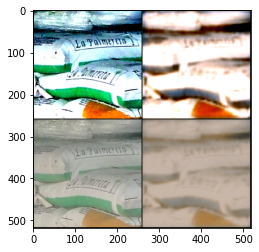

MS-SSIM loss: 0.257 | MSE: 18111.912 | perceptual loss: 1474945.875 | bpp: 213.886 |  PSNR: 23.222


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


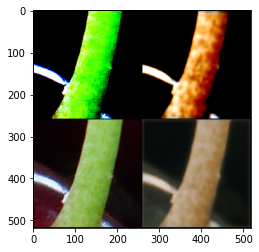

MS-SSIM loss: 0.283 | MSE: 35663.059 | perceptual loss: 1604534.000 | bpp: 1098.861 |  PSNR: 20.355


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


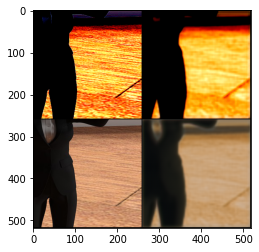

MS-SSIM loss: 0.317 | MSE: 21340.637 | perceptual loss: 1831375.625 | bpp: 1890.570 |  PSNR: 22.536


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


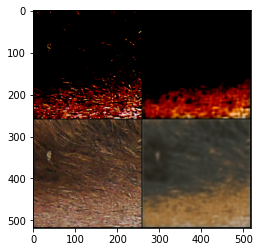

MS-SSIM loss: 0.430 | MSE: 19839.191 | perceptual loss: 2073787.625 | bpp: 1286.488 |  PSNR: 22.868


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


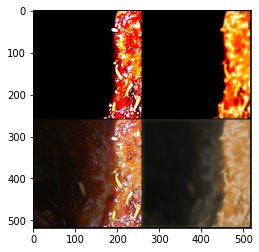

MS-SSIM loss: 0.332 | MSE: 35532.766 | perceptual loss: 1977620.500 | bpp: 1821.623 |  PSNR: 20.358


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


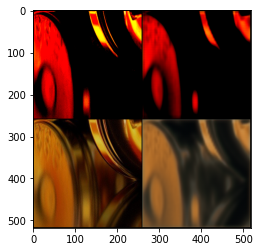

MS-SSIM loss: 0.313 | MSE: 37418.320 | perceptual loss: 1782755.375 | bpp: 1747.145 |  PSNR: 20.105


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


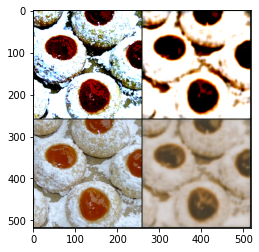

MS-SSIM loss: 0.291 | MSE: 49893.316 | perceptual loss: 2442642.750 | bpp: 596.388 |  PSNR: 18.877


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


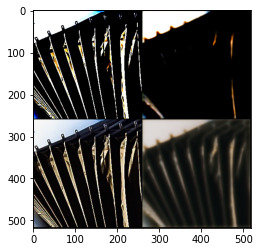

MS-SSIM loss: 0.518 | MSE: 198965.047 | perceptual loss: 3287977.500 | bpp: 2082.544 |  PSNR: 12.865


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


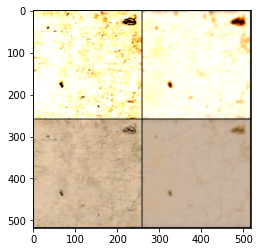

MS-SSIM loss: 0.518 | MSE: 9235.668 | perceptual loss: 1399596.250 | bpp: 252.253 |  PSNR: 26.179


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


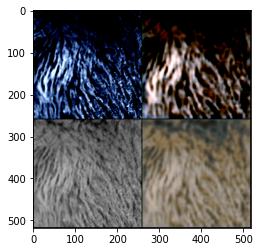

MS-SSIM loss: 0.505 | MSE: 19770.715 | perceptual loss: 1629605.875 | bpp: 116.410 |  PSNR: 22.878


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


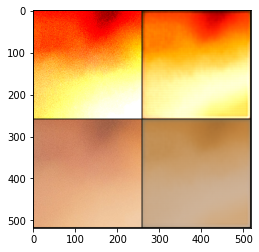

MS-SSIM loss: 0.361 | MSE: 18584.148 | perceptual loss: 894373.438 | bpp: 1893.330 |  PSNR: 23.115


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


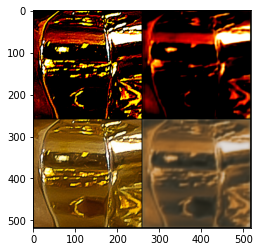

MS-SSIM loss: 0.394 | MSE: 84340.719 | perceptual loss: 2842408.500 | bpp: 800.723 |  PSNR: 16.589


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


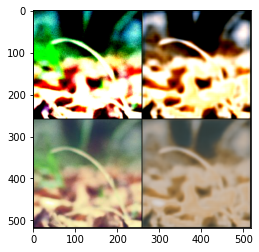

MS-SSIM loss: 0.273 | MSE: 30435.643 | perceptual loss: 1424995.125 | bpp: 447.557 |  PSNR: 21.011


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


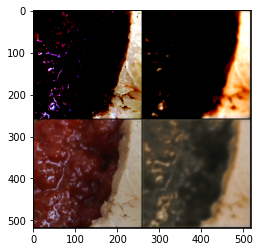

MS-SSIM loss: 0.257 | MSE: 31213.531 | perceptual loss: 1772140.500 | bpp: 947.575 |  PSNR: 20.900


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


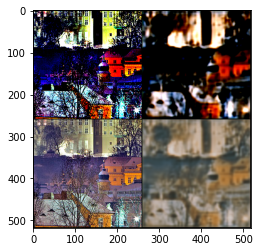

MS-SSIM loss: 0.572 | MSE: 99571.625 | perceptual loss: 3756364.000 | bpp: 516.595 |  PSNR: 15.873


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


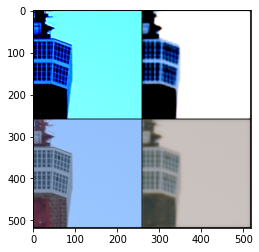

MS-SSIM loss: 0.162 | MSE: 102230.117 | perceptual loss: 983495.000 | bpp: 348.870 |  PSNR: 15.740


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


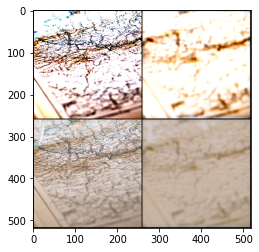

MS-SSIM loss: 0.468 | MSE: 42179.328 | perceptual loss: 2068859.875 | bpp: 717.238 |  PSNR: 19.606


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


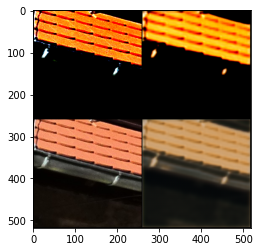

MS-SSIM loss: 0.248 | MSE: 32571.842 | perceptual loss: 1825048.125 | bpp: 2381.924 |  PSNR: 20.698


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


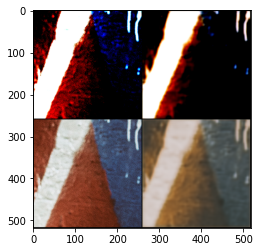

MS-SSIM loss: 0.313 | MSE: 31527.359 | perceptual loss: 1743226.250 | bpp: 627.729 |  PSNR: 20.871


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


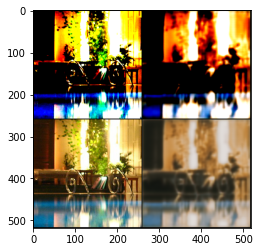

MS-SSIM loss: 0.311 | MSE: 69608.633 | perceptual loss: 2612137.750 | bpp: 470.315 |  PSNR: 17.416


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


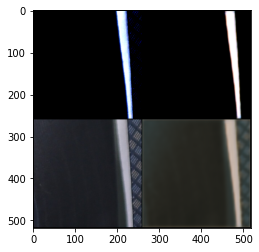

MS-SSIM loss: 0.120 | MSE: 7173.373 | perceptual loss: 886736.812 | bpp: 1397.322 |  PSNR: 27.291


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


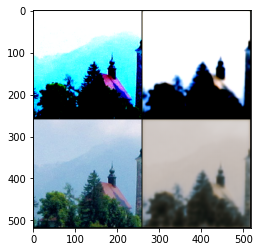

MS-SSIM loss: 0.345 | MSE: 49523.516 | perceptual loss: 1669300.000 | bpp: 432.235 |  PSNR: 18.879


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


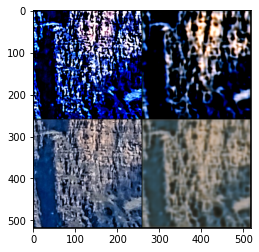

MS-SSIM loss: 0.334 | MSE: 77513.570 | perceptual loss: 2652586.250 | bpp: 94.543 |  PSNR: 16.956


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


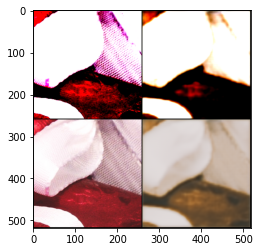

MS-SSIM loss: 0.351 | MSE: 58489.039 | perceptual loss: 1736904.250 | bpp: 533.222 |  PSNR: 18.189


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


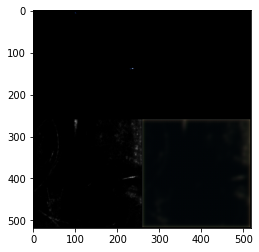

MS-SSIM loss: 0.181 | MSE: 6411.460 | perceptual loss: 1586331.500 | bpp: 6413.137 |  PSNR: 27.797


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


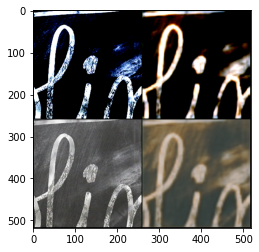

MS-SSIM loss: 0.273 | MSE: 31586.211 | perceptual loss: 1864900.000 | bpp: 868.567 |  PSNR: 20.861


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


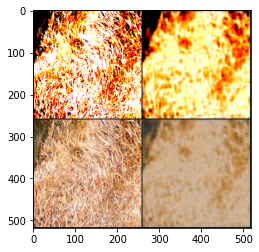

MS-SSIM loss: 0.547 | MSE: 63714.059 | perceptual loss: 2944122.250 | bpp: 201.868 |  PSNR: 17.814


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


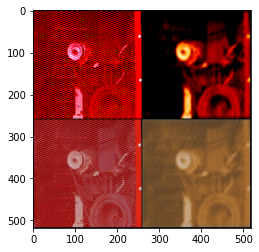

MS-SSIM loss: 0.586 | MSE: 96318.914 | perceptual loss: 2874234.000 | bpp: 1776.650 |  PSNR: 16.029


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


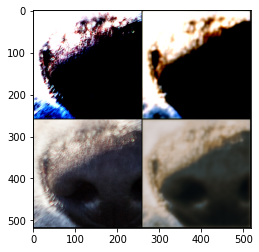

MS-SSIM loss: 0.212 | MSE: 19618.623 | perceptual loss: 1666682.375 | bpp: 800.843 |  PSNR: 22.935


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


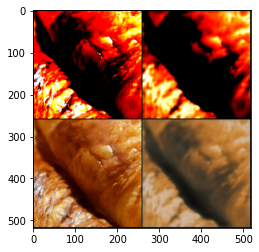

MS-SSIM loss: 0.328 | MSE: 48211.992 | perceptual loss: 1868745.250 | bpp: 456.924 |  PSNR: 19.006


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


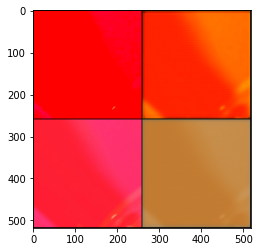

MS-SSIM loss: 0.471 | MSE: 244836.688 | perceptual loss: 1114477.750 | bpp: 2545.629 |  PSNR: 11.984


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


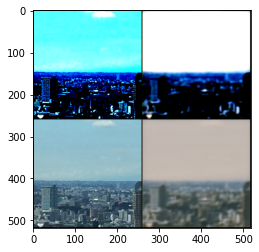

MS-SSIM loss: 0.261 | MSE: 49110.699 | perceptual loss: 1425726.250 | bpp: 250.273 |  PSNR: 18.889


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


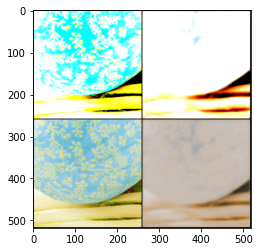

MS-SSIM loss: 0.655 | MSE: 68166.992 | perceptual loss: 2230682.000 | bpp: 198.482 |  PSNR: 17.499


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


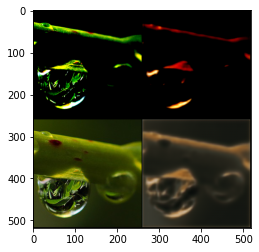

MS-SSIM loss: 0.316 | MSE: 38260.469 | perceptual loss: 1623672.875 | bpp: 1898.861 |  PSNR: 20.056


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


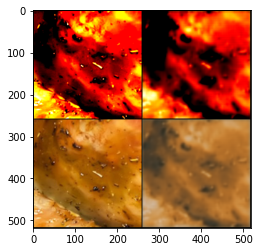

MS-SSIM loss: 0.290 | MSE: 35766.918 | perceptual loss: 1669858.000 | bpp: 919.100 |  PSNR: 20.310


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


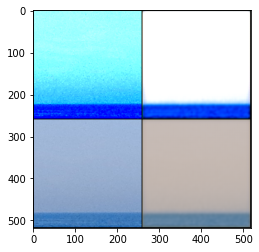

MS-SSIM loss: 0.246 | MSE: 54545.590 | perceptual loss: 784644.125 | bpp: 319.080 |  PSNR: 18.437


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


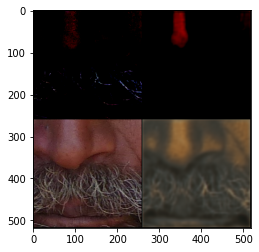

MS-SSIM loss: 0.391 | MSE: 21643.566 | perceptual loss: 1869822.000 | bpp: 250.682 |  PSNR: 22.497


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


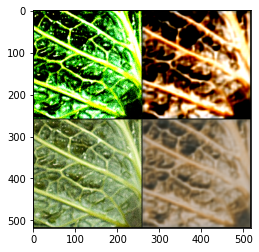

MS-SSIM loss: 0.300 | MSE: 56954.273 | perceptual loss: 2646871.500 | bpp: 240.030 |  PSNR: 18.299


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


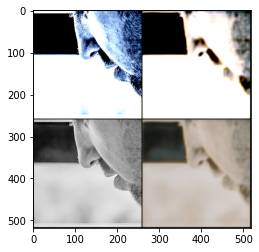

MS-SSIM loss: 0.202 | MSE: 27857.057 | perceptual loss: 1225917.500 | bpp: 300.128 |  PSNR: 21.409


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


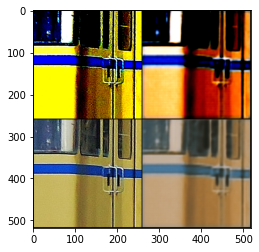

MS-SSIM loss: 0.355 | MSE: 67329.727 | perceptual loss: 2209058.500 | bpp: 226.757 |  PSNR: 17.574


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


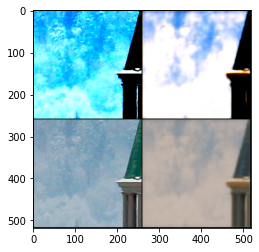

MS-SSIM loss: 0.266 | MSE: 42869.039 | perceptual loss: 1199293.250 | bpp: 161.107 |  PSNR: 19.464


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


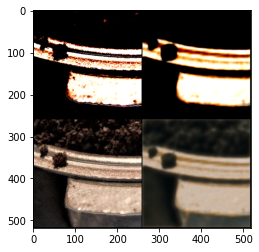

MS-SSIM loss: 0.294 | MSE: 27275.199 | perceptual loss: 2106325.500 | bpp: 1489.596 |  PSNR: 21.490


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


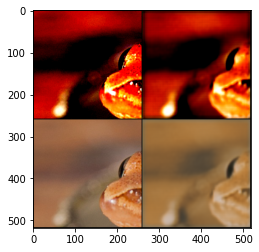

MS-SSIM loss: 0.175 | MSE: 10745.299 | perceptual loss: 967560.188 | bpp: 115.216 |  PSNR: 25.538


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


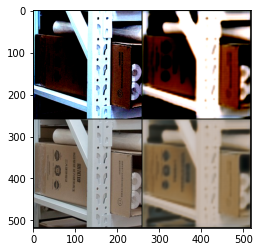

MS-SSIM loss: 0.248 | MSE: 27755.230 | perceptual loss: 1941206.625 | bpp: 147.673 |  PSNR: 21.414


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


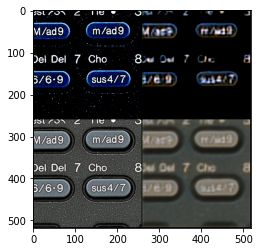

MS-SSIM loss: 0.414 | MSE: 81110.211 | perceptual loss: 2800113.000 | bpp: 288.339 |  PSNR: 16.764


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


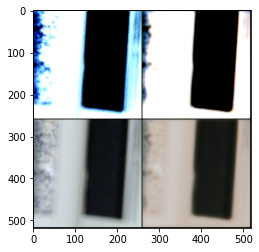

MS-SSIM loss: 0.200 | MSE: 16253.366 | perceptual loss: 1134049.000 | bpp: 915.999 |  PSNR: 23.738


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


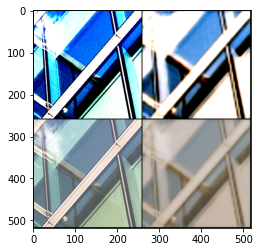

MS-SSIM loss: 0.296 | MSE: 51566.051 | perceptual loss: 2012934.000 | bpp: 781.542 |  PSNR: 18.714


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


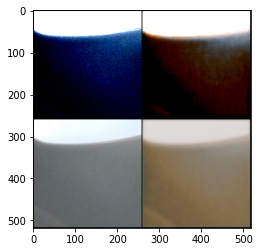

MS-SSIM loss: 0.746 | MSE: 39404.844 | perceptual loss: 839267.875 | bpp: 1171.683 |  PSNR: 19.899


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


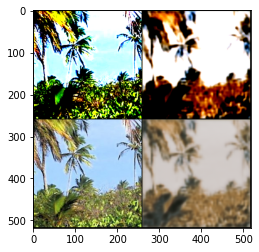

MS-SSIM loss: 0.321 | MSE: 91126.398 | perceptual loss: 2665873.750 | bpp: 152.814 |  PSNR: 16.258


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


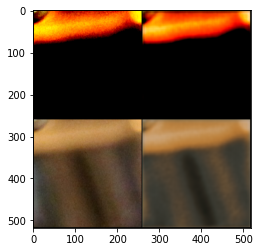

MS-SSIM loss: 0.225 | MSE: 6026.040 | perceptual loss: 997337.438 | bpp: 710.350 |  PSNR: 28.018


In [6]:
msssim_total, mse_total, perceptual_total, bpp_total, PSNR_total = finetune(jpeg_ai, encoder, importance, decoder, probabilityModel, 
                                                           device, L1_loss, MSE_loss,
                                                           vgg16, round_straightthrough, dec_bias, d1, d2, d3)

In [7]:
print('='*80)
print('msssim: {:.3f} | mse: {:.3f} | perceptual: {:.3f} | bpp: {:.3f} | PSNR: {:.3f}'.format(
      msssim_total.tolist()/50, mse_total.tolist()/50, perceptual_total.tolist()/50, bpp_total.tolist()/50, PSNR_total/50))

msssim: 0.341 | mse: 50103.955 | perceptual: 1852862.560 | bpp: 926.334 | PSNR: 20.121
